# Discusión 2
## Método de punto fijo

In [2]:
from math import cos, log, exp
import matplotlib.pyplot as plt
import numpy as np

In [1]:
'''
g: función con un único punto fijo
p0: aproximación inicial del punto fijo
TOL: precisión deseada
Nmax: número máximo de iteraciones
'''
def fixedPoint(g, p0, TOL, Nmax):
    for i in range(0, Nmax):
        p = g(p0)
        print( "{0:d} \t {1:.15f} \t {2:.15f} \t {3:.5e} ".format(i, p0, p, abs(p0-p)) )
        if abs(p - p0) < TOL:
            break
        p0 = p    

Ejemplo: aproximando el punto fijo de $\cos(x)$ en el intervalo $[0.5, 1]$.

In [4]:
fixedPoint(lambda x: cos(x), 0.5, 10**-6, 1000)

0 	 0.500000000000000 	 0.877582561890373 	 3.77583e-01 
1 	 0.877582561890373 	 0.639012494165259 	 2.38570e-01 
2 	 0.639012494165259 	 0.802685100682335 	 1.63673e-01 
3 	 0.802685100682335 	 0.694778026788006 	 1.07907e-01 
4 	 0.694778026788006 	 0.768195831282016 	 7.34178e-02 
5 	 0.768195831282016 	 0.719165445942419 	 4.90304e-02 
6 	 0.719165445942419 	 0.752355759421527 	 3.31903e-02 
7 	 0.752355759421527 	 0.730081063137823 	 2.22747e-02 
8 	 0.730081063137823 	 0.745120341351440 	 1.50393e-02 
9 	 0.745120341351440 	 0.735006309014843 	 1.01140e-02 
10 	 0.735006309014843 	 0.741826522643246 	 6.82021e-03 
11 	 0.741826522643246 	 0.737235725442231 	 4.59080e-03 
12 	 0.737235725442231 	 0.740329651878263 	 3.09393e-03 
13 	 0.740329651878263 	 0.738246238332233 	 2.08341e-03 
14 	 0.738246238332233 	 0.739649962769661 	 1.40372e-03 
15 	 0.739649962769661 	 0.738704539356983 	 9.45423e-04 
16 	 0.738704539356983 	 0.739341452281210 	 6.36913e-04 
17 	 0.739341452281210 	

# Problema del parcial 1 - 2019

La ecuación que debemos resolver es 
$$ 5 = 10 - 20 ( e^{-0.2x} - e^{-0.75x} ) .$$

Despejando $x$ de la primera exponencial:

$$ \frac{1}{4} = e^{-0.2x} - e^{-0.75x} $$
$$  e^{-0.75x} + 1/4 = e^{-0.2x} $$
$$ \ln( e^{-0.75x} + 1/4 ) = -0.2x $$
$$ -5\ln( e^{-0.75x} + 1/4 ) = x $$

Así, 

$$ g_{1}(x) = -5\ln ( e^{-0.75x} + 1/4)  $$

Despejando la $x$, de la segunda exponencial, obtenemos la segunda candidata:

$$ g_{2}(x) = - \frac{4}{3} \ln(e^{-0.2x} - 1/4) $$

In [9]:
def g1(x):
    return -5*log(exp(-0.75*x) + 1/4)

def g2(x):
    return (-4/3)*log(exp(-0.2*x) - 1/4)

Ahora verificamos si $g_{1}$ cumple la primera de las dos condiciones:

In [7]:
print( 0 - g1(0) < 0 )
print( 2 - g1(2) > 0 )

False
False


Queda descartada. Probemos con $g_{2}$:

In [10]:
print( 0 - g2(0) < 0 )
print( 2 - g2(2) > 0 )

True
True


Así, podemos estar seguros que $g_{2}$ tiene un punto fijo. Ahora debemos verificar unicidad, comprobando que la derivada en valor absoluto no excede $1$ en el intervalo $[0, 2]$. La derivada de $g_{2}$ es 

$$ g_{2}'(x) = \frac{4}{15} \frac{ e^{-0.2x} }{ e^{-0.2x} - 1/4 } $$

Al graficar esta función, notamos que es positiva en el intervalo $[0, 2]$, de manera que no necesitamos considerarla en valor absoluto, y que el máximo en ese intervalo se alcanza en $x=2$, ya que la función es creciente. El valor máximo de $g_{2}'$ no excede $1$, de modo que podemos garantizar la unicidad del punto fijo.

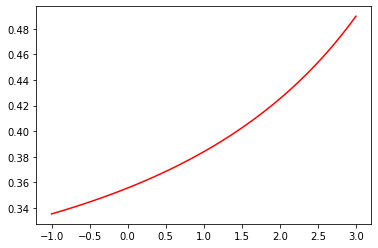

In [4]:
x = np.linspace(-1, 3, 100)
y = (4/15)* ( np.exp(-0.2*x)/( np.exp(-0.2*x) - 1/4 ) )

plt.plot(x,y, 'r')

plt.show()

In [19]:
fixedPoint(g2, 1, 10**-15, 1000)

0 	 1.000000000000000 	 0.752464200042130 	 2.47536e-01 
1 	 0.752464200042130 	 0.658441383029192 	 9.40228e-02 
2 	 0.658441383029192 	 0.623232289267109 	 3.52091e-02 
3 	 0.623232289267109 	 0.610115609520910 	 1.31167e-02 
4 	 0.610115609520910 	 0.605238505643511 	 4.87710e-03 
5 	 0.605238505643511 	 0.603426363567249 	 1.81214e-03 
6 	 0.603426363567249 	 0.602753219143530 	 6.73144e-04 
7 	 0.602753219143530 	 0.602503195056863 	 2.50024e-04 
8 	 0.602503195056863 	 0.602410332701095 	 9.28624e-05 
9 	 0.602410332701095 	 0.602375842820175 	 3.44899e-05 
10 	 0.602375842820175 	 0.602363033044612 	 1.28098e-05 
11 	 0.602363033044612 	 0.602358275415977 	 4.75763e-06 
12 	 0.602358275415977 	 0.602356508404954 	 1.76701e-06 
13 	 0.602356508404954 	 0.602355852126922 	 6.56278e-07 
14 	 0.602355852126922 	 0.602355608381520 	 2.43745e-07 
15 	 0.602355608381520 	 0.602355517853091 	 9.05284e-08 
16 	 0.602355517853091 	 0.602355484230317 	 3.36228e-08 
17 	 0.602355484230317 	